<a href="https://colab.research.google.com/github/asdf1027/knu_bdna_2022.1801311/blob/main/%EA%B9%80%ED%98%84%EC%8B%9D9%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# 9강

In [82]:
!pip install mglearn

In [83]:
import matplotlib.pyplot as plt
import mglearn

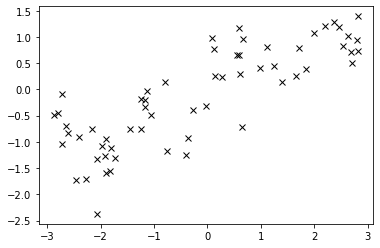

In [84]:
X,y=mglearn.datasets.make_wave(n_samples=60)
plt.plot(X,y,'kx')

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
print('weight:',lr.coef_)

weight: [0.39390555]


In [90]:
print('bias:',lr.intercept_)

bias: -0.031804343026759746


In [91]:
print("Train Accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(lr.score(X_test,y_test)))

Train Accuracy: 0.67
Test Accuracy: 0.66


In [92]:
# Boston set 불러오기
from mglearn.datasets import load_extended_boston

In [93]:
X,y=load_extended_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [94]:
X.shape

(506, 104)

In [95]:
y.shape

(506,)

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [97]:
lr=LinearRegression().fit(X_train,y_train)

In [98]:
print("Train Accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(lr.score(X_test,y_test)))

Train Accuracy: 0.95
Test Accuracy: 0.61


In [99]:
# Ridge 회귀
from sklearn.linear_model import Ridge

In [100]:
ridge=Ridge().fit(X_train,y_train)

In [101]:
print("Train Accuracy: {:.4f}".format(ridge.score(X_train,y_train)))
print("Test Accuracy: {:.4f}".format(ridge.score(X_test,y_test)))

Train Accuracy: 0.8858
Test Accuracy: 0.7528


In [102]:
print("Train Accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(lr.score(X_test,y_test)))
# 이전 선형 모델

Train Accuracy: 0.95
Test Accuracy: 0.61


In [103]:
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print("Train Accuracy: {:.4f}".format(ridge01.score(X_train,y_train)))
print("Test Accuracy: {:.4f}".format(ridge01.score(X_test,y_test)))
# alpha=0.1 일 때 결과

Train Accuracy: 0.9282
Test Accuracy: 0.7722


In [104]:
ridge1=Ridge(alpha=1.0).fit(X_train,y_train)
print("Train Accuracy: {:.4f}".format(ridge1.score(X_train,y_train)))
print("Test Accuracy: {:.4f}".format(ridge1.score(X_test,y_test)))
# alpha=1.0 일 때 결과

Train Accuracy: 0.8858
Test Accuracy: 0.7528


In [105]:
ridge10=Ridge(alpha=10).fit(X_train,y_train)
print("Train Accuracy: {:.4f}".format(ridge10.score(X_train,y_train)))
print("Test Accuracy: {:.4f}".format(ridge10.score(X_test,y_test)))
# alpha=10 일 때 결과

Train Accuracy: 0.7883
Test Accuracy: 0.6359


In [106]:
import numpy as np

In [107]:
alpha=np.linspace(0,1,1000)

In [108]:
training_accuracy=[]
test_accuracy=[]
iteration=[]

for i in range(1000):
  ridge=Ridge(alpha=alpha[i]).fit(X_train,y_train)
  training_accuracy.append(ridge.score(X_train,y_train))
  test_accuracy.append(ridge.score(X_test,y_test))
  iteration.append(i)

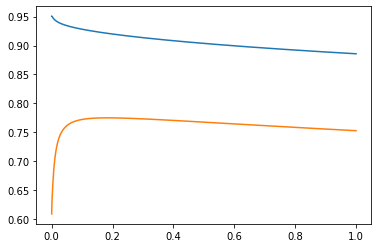

In [109]:
plt.plot(alpha,training_accuracy)
plt.plot(alpha,test_accuracy)

In [110]:
np.argmax(test_accuracy)

184

In [111]:
alpha[184]

0.1841841841841842

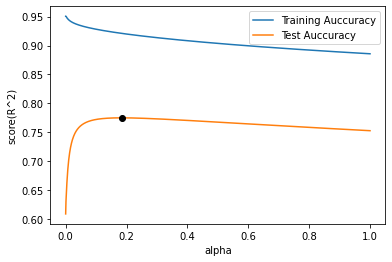

In [112]:
plt.plot(alpha,training_accuracy,label='Training Auccuracy')
plt.plot(alpha,test_accuracy,label='Test Auccuracy')
plt.plot(alpha[184],test_accuracy[184],'ko')
plt.xlabel('alpha')
plt.ylabel('score(R^2)')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

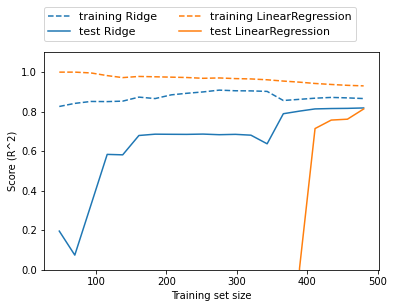

In [113]:
mglearn.plots.plot_ridge_n_samples()

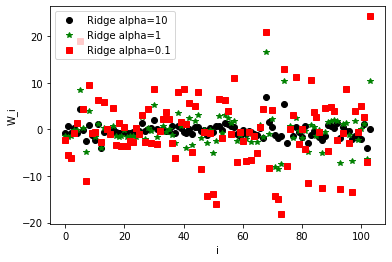

In [114]:
plt.plot(ridge10.coef_,'ko',label='Ridge alpha=10')
plt.plot(ridge1.coef_,'g*',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'rs',label='Ridge alpha=0.1')
# plt.plot(lr.coef_,'bv',label='Linear Regression')
plt.xlabel('i')
plt.ylabel('W_i')
plt.legend()
plt.show()

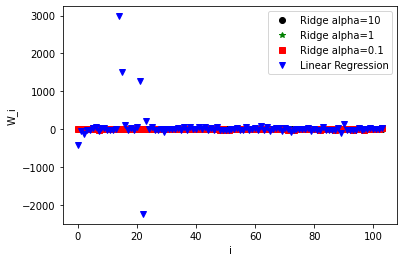

In [115]:
plt.plot(ridge10.coef_,'ko',label='Ridge alpha=10')
plt.plot(ridge1.coef_,'g*',label='Ridge alpha=1')
plt.plot(ridge01.coef_,'rs',label='Ridge alpha=0.1')
plt.plot(lr.coef_,'bv',label='Linear Regression')
plt.xlabel('i')
plt.ylabel('W_i')
plt.legend()
plt.show()

In [126]:
# Lasso 회귀
from sklearn.linear_model import Lasso

In [127]:
lasso=Lasso().fit(X_train,y_train)

In [128]:
print('Training Auccuracy: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test Auccuracy: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_!=0))

Training Auccuracy: 0.29
Test Auccuracy: 0.21
Number of features used: 4


In [129]:
lasso=Lasso(alpha=0.1).fit(X_train,y_train)

print('Training Auccuracy: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test Auccuracy: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_ !=0))

Training Auccuracy: 0.77
Test Auccuracy: 0.63
Number of features used: 8


In [130]:
lasso=Lasso(alpha=0.01,max_iter=1000000).fit(X_train,y_train)

print('Training Auccuracy: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test Auccuracy: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_ !=0))

Training Auccuracy: 0.90
Test Auccuracy: 0.77
Number of features used: 33


In [121]:
lasso=Lasso(alpha=0.0001,max_iter=1000000).fit(X_train,y_train)

print('Training Auccuracy: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test Auccuracy: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_ !=0))

Training Auccuracy: 0.95
Test Auccuracy: 0.64
Number of features used: 96


In [122]:
# 결과 비교하기 - (Lasso, Ridge, LinearRegression)

In [123]:
lasso=Lasso(alpha=0.01,max_iter=1000000).fit(X_train,y_train)

print('Training Auccuracy: {:.2f}'.format(lasso.score(X_train,y_train)))
print('Test Auccuracy: {:.2f}'.format(lasso.score(X_test,y_test)))
print('Number of features used:',np.sum(lasso.coef_ !=0))

Training Auccuracy: 0.90
Test Auccuracy: 0.77
Number of features used: 33


In [131]:
print("Train Accuracy: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(ridge.score(X_test,y_test)))

Train Accuracy: 0.89
Test Accuracy: 0.75


In [125]:
print("Train Accuracy: {:.2f}".format(lr.score(X_train,y_train)))
print("Test Accuracy: {:.2f}".format(lr.score(X_test,y_test)))

Train Accuracy: 0.95
Test Accuracy: 0.61
